# IMDB EDA (CORE)

**Marco Jimenez**

In [158]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
# Reading in the 2000 and 2001 dataframes
df_2000 = pd.read_csv("Data/final_tmdb_data_2000.csv.gz")
df_2001 = pd.read_csv("Data/final_tmdb_data_2001.csv.gz")
# Concatenating the two dataframes
df = pd.concat([df_2000, df_2001])
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1884.0,PG


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2479 entries, 0 to 1280
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2479 non-null   object 
 1   adult                  2477 non-null   float64
 2   backdrop_path          1257 non-null   object 
 3   belongs_to_collection  194 non-null    object 
 4   budget                 2477 non-null   float64
 5   genres                 2477 non-null   object 
 6   homepage               173 non-null    object 
 7   id                     2477 non-null   float64
 8   original_language      2477 non-null   object 
 9   original_title         2477 non-null   object 
 10  overview               2424 non-null   object 
 11  popularity             2477 non-null   float64
 12  poster_path            2173 non-null   object 
 13  production_companies   2477 non-null   object 
 14  production_countries   2477 non-null   object 
 15  rele

In [161]:
# Getting movies that had at least some valid financial information
budget_df = df.loc[df['budget'] > 0]
revenue_df = df.loc[df['revenue'] > 0]
# Concatenating the dataframes and displaying the shape to count the number of movies with valid financial data
financial_df = pd.concat([budget_df, revenue_df])

In [162]:
print(f"Movies with a budget over 0: {len(budget_df['budget'])}")
print(f"Movies with revenue over 0: {len(revenue_df['revenue'])}")
print("\n")
print(f"Total number of movies with valid financial information: {len(financial_df)} ")

Movies with a budget over 0: 536
Movies with revenue over 0: 426


Total number of movies with valid financial information: 962 


In [163]:
certs = df['certification'].value_counts()
certs

R          449
PG-13      180
NR          63
PG          62
G           24
NC-17        6
Unrated      1
-            1
Name: certification, dtype: int64

In [165]:
cert_order = ['G','PG','PG-13','R']

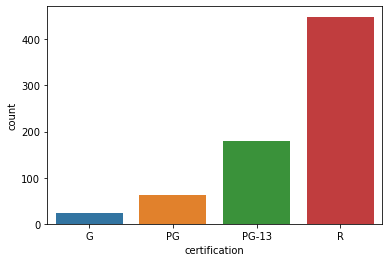

In [167]:
sns.countplot(data=df, x='certification', order=cert_order);

In [172]:
plot_df = df[df['certification'].isin(cert_order)]
plot_df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1884.0,PG
5,tt0118852,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.9,46.0,R
6,tt0119273,0.0,/fClJrAmJQ90zg9gWnfHVYSMiDTv.jpg,"{'id': 141086, 'name': 'Heavy Metal Collection...",15000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,16225.0,en,Heavy Metal 2000,...,0.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,not to survive the fight in the external world...,Heavy Metal 2000,0.0,6.1,151.0,R
7,tt0119495,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,51181.0,en,Love 101,...,0.0,86.0,[],Released,NaN,Love 101,0.0,0.0,0.0,R
11,tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,...,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.4,41.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,tt0329589,0.0,/ayGKiqIO1leQbt4WXl3aKFxAbdN.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,53501.0,en,Shark Hunter,...,0.0,94.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Danger In The Deep,Shark Hunter,0.0,4.4,13.0,PG
1188,tt0364722,0.0,NaN,NaN,1000000.0,"[{'id': 28, 'name': 'Action'}]",NaN,440591.0,en,The Ultimate Game,...,0.0,91.0,[],Released,They Play for Keeps!,The Ultimate Game,0.0,0.0,0.0,R
1233,tt0810831,0.0,/foJtMkj948xDdfKkAemGplkQ9ly.jpg,"{'id': 39244, 'name': 'Digimon Collection', 'p...",0.0,"[{'id': 16, 'name': 'Animation'}]",NaN,36200.0,ja,デジモンテイマーズ 冒険者たちの戦い,...,0.0,50.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,NaN,Digimon Tamers: Battle of Adventurers,0.0,7.0,10.0,G
1235,tt0832449,0.0,/qgaVJE4SK2qRtggVyRlISKQ1zBE.jpg,"{'id': 23456, 'name': 'One Piece Collection', ...",0.0,"[{'id': 28, 'name': 'Action'}, {'id': 16, 'nam...",https://one-piece.com/comicsanime/movie/detail...,23446.0,ja,ワンピース ねじまき島の冒険,...,0.0,60.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,NaN,One Piece: Clockwork Island Adventure,0.0,6.8,186.0,PG-13
